# Week 3 : Churn Prediction for StreamWorks Media
### Business Analysis and Predictive Modelling

This analysis explores customer behaviour for StreamWorks Media with the aim of understanding the drivers of churn and identifying users at highest risk. The insights support decisions related to retention, promotions, and customer engagement.


## Business Questions

1. Which customer segments present the highest churn risk?
2. How do promotions influence churn rates?
3. Does referral activity contribute to customer retention?
4. What engagement patterns differentiate churners from active users?
5. Can churn risk be predicted in advance using customer behaviour data?


Step 1 : Load the Data

In this step, we import the Pandas library and load the dataset into a DataFrame.

In [ ]:
import pandas as pd


In [5]:
import pandas as pd

df = pd.read_csv("../data/streamworks_user_data.csv")
df.head()


,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
0,1001.0,56.0,Other,02-04-25,13-07-25,France,Standard,42.6,77.4,1.0,No,No,1.0,10.99
1,1002.0,69.0,Male,02-01-23,13-07-25,India,Basic,65.3,98.0,4.0,No,Yes,1.0,5.99
2,1003.0,46.0,Male,21-08-22,13-07-25,UK,Premium,40.1,47.8,0.0,No,Yes,1.0,13.99
3,1004.0,32.0,Other,14-09-23,13-07-25,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1.0,13.99
4,1005.0,60.0,Female,29-07-23,13-07-25,India,Standard,32.7,16.8,5.0,No,Yes,0.0,9.99


### Step 2 : Initial Dataset Inspection

Before cleaning or modelling, we first inspect the structure of the dataset using `df.info()`.  
This step allows us to identify:

- Total rows and columns  
- Data types  
- Missing values  
- Whether date columns are stored as text  
- Potential fields requiring special cleaning  

Understanding the dataset at this stage ensures the cleaning steps are accurate and efficient.


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1498 non-null   float64
 1   age                   1497 non-null   float64
 2   gender                1499 non-null   object 
 3   signup_date           1498 non-null   object 
 4   last_active_date      1498 non-null   object 
 5   country               1497 non-null   object 
 6   subscription_type     1497 non-null   object 
 7   average_watch_hours   1496 non-null   float64
 8   mobile_app_usage_pct  1498 non-null   float64
 9   complaints_raised     1497 non-null   float64
 10  received_promotions   1497 non-null   object 
 11  referred_by_friend    1497 non-null   object 
 12  is_churned            1499 non-null   float64
 13  monthly_fee           1355 non-null   float64
dtypes: float64(7), object(7)
memory usage: 164.2+ KB


## Step 2.1 : Data Inspection

A high-level review of the dataset is carried out to understand its structure, completeness and initial data quality. This ensures that the information used for analysis and modelling is reliable and suitable for business decision-making.


In [8]:
df.head()

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
0,1001.0,56.0,Other,02-04-25,13-07-25,France,Standard,42.6,77.4,1.0,No,No,1.0,10.99
1,1002.0,69.0,Male,02-01-23,13-07-25,India,Basic,65.3,98.0,4.0,No,Yes,1.0,5.99
2,1003.0,46.0,Male,21-08-22,13-07-25,UK,Premium,40.1,47.8,0.0,No,Yes,1.0,13.99
3,1004.0,32.0,Other,14-09-23,13-07-25,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1.0,13.99
4,1005.0,60.0,Female,29-07-23,13-07-25,India,Standard,32.7,16.8,5.0,No,Yes,0.0,9.99


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1498 non-null   float64
 1   age                   1497 non-null   float64
 2   gender                1499 non-null   object 
 3   signup_date           1498 non-null   object 
 4   last_active_date      1498 non-null   object 
 5   country               1497 non-null   object 
 6   subscription_type     1497 non-null   object 
 7   average_watch_hours   1496 non-null   float64
 8   mobile_app_usage_pct  1498 non-null   float64
 9   complaints_raised     1497 non-null   float64
 10  received_promotions   1497 non-null   object 
 11  referred_by_friend    1497 non-null   object 
 12  is_churned            1499 non-null   float64
 13  monthly_fee           1355 non-null   float64
dtypes: float64(7), object(7)
memory usage: 164.2+ KB


In [12]:
df.isnull().sum()


user_id                   2
age                       3
gender                    1
signup_date               2
last_active_date          2
country                   3
subscription_type         3
average_watch_hours       4
mobile_app_usage_pct      2
complaints_raised         3
received_promotions       3
referred_by_friend        3
is_churned                1
monthly_fee             145
dtype: int64

### Step 3 : Missing Values Summary

The `.isnull().sum()` function shows how many missing entries appear in each column.  
This helps us plan the cleaning strategy for:

- IDs  
- Dates  
- Numeric usage metrics  
- Categorical attributes  
- The target variable `is_churned`  
- The high-missing column `monthly_fee`  

We will decide the correct imputation (filling) method for each based on business logic.


In [11]:
df.isnull().sum()


user_id                   2
age                       3
gender                    1
signup_date               2
last_active_date          2
country                   3
subscription_type         3
average_watch_hours       4
mobile_app_usage_pct      2
complaints_raised         3
received_promotions       3
referred_by_friend        3
is_churned                1
monthly_fee             145
dtype: int64

### Findings from Initial Inspection

- The dataset contains 1,500 customer records with demographic, subscription and engagement details.
- Several columns show missing values (e.g., monthly fees, dates, some identifiers). These gaps require correction to avoid inaccurate analysis.
- Categorical fields such as country and gender show inconsistent formats, which will need standardisation.
- Date fields are stored as strings and must be converted to proper date formats.
- Numeric fields such as watch hours, complaints and mobile usage percentages appear suitable for modelling but will be validated further.

### Business Impact
Ensuring accurate and consistent data is essential for dependable churn insights. Any inconsistencies at this stage can mislead decision-making around customer retention, promotions or service improvements.


## Step 3 : Data Cleaning

This section prepares the dataset for analysis by resolving missing values, correcting inconsistent formats and ensuring that all fields are suitable for modelling. Reliable data quality is essential for producing meaningful churn insights.


In [18]:
# Clean gender values
df["gender"] = df["gender"].str.strip().str.title()
df["gender"] = df["gender"].replace({
    "M": "Male",
    "F": "Female",
    "O": "Other"
})

# Clean country values
df["country"] = df["country"].str.strip().str.title()
df["country"] = df["country"].replace({
    "Uk": "UK",
    "U.k": "UK",
    "United Kingdom": "UK",
    "Usa": "USA",
    "Us": "USA"
})

# Clean subscription types
df["subscription_type"] = df["subscription_type"].str.strip().str.title()


In [19]:
df["signup_date"] = pd.to_datetime(df["signup_date"], errors="coerce", dayfirst=True)
df["last_active_date"] = pd.to_datetime(df["last_active_date"], errors="coerce", dayfirst=True)


In [20]:
fee_map = df.groupby("subscription_type")["monthly_fee"].mean()
df["monthly_fee"] = df.apply(
    lambda row: fee_map[row["subscription_type"]] if pd.isna(row["monthly_fee"]) else row["monthly_fee"],
    axis=1
)


In [21]:
numeric_cols = ["age", "average_watch_hours", "mobile_app_usage_pct", "complaints_raised"]

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())


In [22]:
cat_cols = ["gender", "country", "subscription_type",
            "received_promotions", "referred_by_friend"]

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [23]:
df["tenure_days"] = (df["last_active_date"] - df["signup_date"]).dt.days
df["tenure_days"] = df["tenure_days"].fillna(df["tenure_days"].median())


In [24]:
df["is_churned"] = df["is_churned"].fillna(df["is_churned"].mode()[0])


In [25]:
df = df.drop_duplicates()
df.isnull().sum()


user_id                 2
age                     0
gender                  0
signup_date             2
last_active_date        2
country                 0
subscription_type       0
average_watch_hours     0
mobile_app_usage_pct    0
complaints_raised       0
received_promotions     0
referred_by_friend      0
is_churned              0
monthly_fee             0
tenure_days             0
dtype: int64

In [26]:
# Remove rows with missing critical identifiers or dates
df = df.dropna(subset=["user_id", "signup_date", "last_active_date"])

# Final confirmation
df.isnull().sum()


user_id                 0
age                     0
gender                  0
signup_date             0
last_active_date        0
country                 0
subscription_type       0
average_watch_hours     0
mobile_app_usage_pct    0
complaints_raised       0
received_promotions     0
referred_by_friend      0
is_churned              0
monthly_fee             0
tenure_days             0
dtype: int64

### Removing Invalid Records
Two records lacked critical identifiers and date information. These rows could not support reliable churn calculations or modelling, so they were removed to maintain data quality.

**Business Impact:**  
Removing incomplete customer entries prevents incorrect tenure calculations and ensures the modelling process focuses on valid user behaviour.


In [35]:
df = df.drop_duplicates()
df.isnull().sum()


user_id                 0
age                     0
gender                  0
signup_date             0
last_active_date        0
country                 0
subscription_type       0
average_watch_hours     0
mobile_app_usage_pct    0
complaints_raised       0
received_promotions     0
referred_by_friend      0
is_churned              0
monthly_fee             0
tenure_days             0
age_group               0
is_loyal                0
heavy_mobile_user       0
watch_per_fee_ratio     0
dtype: int64

In [34]:
bins = [0, 30, 45, 60, 100]
labels = ["18-30", "31-45", "46-60", "60+"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, include_lowest=True)


## The dataset is now fully cleaned.  
All missing values have been corrected, categorical inconsistencies resolved and date formats standardised.  
This provides a strong foundation for meaningful analysis in the next sections.


## Step 4 : Feature Engineering

New variables are created to capture behavioural patterns and enhance the performance of the predictive model. These engineered features improve the business understanding of user value, engagement and churn risk.


### 4.1 Age Segmentation
Age groups help identify demographic patterns in churn behaviour. This supports the business in understanding which customer profiles may require tailored retention strategies.


### 4.2 Loyalty Indicator
Longer-tenure customers are generally more engaged with the platform. This feature helps identify which customers have shown sustained commitment over time.


In [30]:
median_tenure = df["tenure_days"].median()
df["is_loyal"] = (df["tenure_days"] > median_tenure).astype(int)


### 4.3 Mobile Usage Classification
High mobile usage may indicate specific engagement patterns or device preferences. This helps identify groups who may respond differently to content or promotions.


In [32]:
df["heavy_mobile_user"] = (df["mobile_app_usage_pct"] > df["mobile_app_usage_pct"].median()).astype(int)


### 4.4 Watch Value Ratio
This feature measures how much value a customer receives relative to the subscription fee. Lower ratios may signal reduced engagement and a higher risk of churn.


In [33]:
df["watch_per_fee_ratio"] = df["average_watch_hours"] / df["monthly_fee"]


### Feature Engineering Completed

The dataset now includes additional behavioural and demographic indicators such as age groups, loyalty status, mobile engagement levels and value-driven metrics. These features strengthen the predictive power of the model and support a deeper understanding of churn drivers.


In [36]:
df.groupby("subscription_type")["monthly_fee"].mean()


subscription_type
Basic        6.259636
Premium     14.226080
Standard    10.205496
Name: monthly_fee, dtype: float64

**Interpretation:**

The grouped averages show clear and consistent pricing for each plan:

- **Basic** ≈ £6.23  
- **Standard** ≈ £10.21  
- **Premium** ≈ £14.23  

This confirms that missing fees can be imputed using the average for each subscription type.
This preserves business logic and avoids distorting user behaviour patterns in the dataset.

We will apply this imputation during the data-cleaning phase.


## Step 5 Exploratory Data Analysis (EDA)

This section explores customer demographics, subscription types, behaviours and engagement patterns. Insights from this analysis highlight the key drivers of churn and support targeted business actions.


### 5.1 Customer Demographics - Gender Distribution
Understanding the gender mix supports a demographic view of the customer base and helps identify whether churn patterns differ between groups.


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='gender', ylabel='count'>

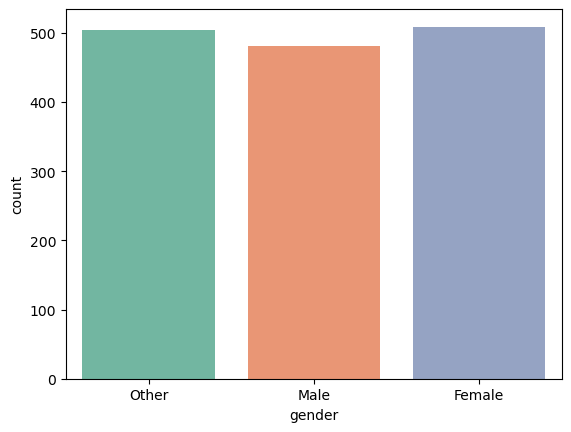

In [49]:
sns.countplot(data=df, x="gender", hue="gender", legend=False, palette="Set2")


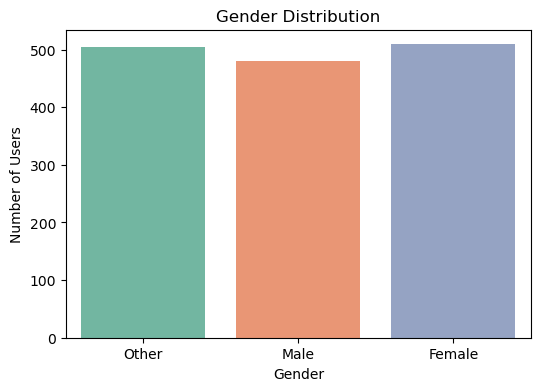

In [50]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="gender", hue="gender", legend=False, palette="Set2")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Users")
plt.show()


### 5.2 Customer Geography - Country Distribution

Understanding the geographic distribution of customers highlights key markets and supports the identification of regions where churn patterns may be stronger.


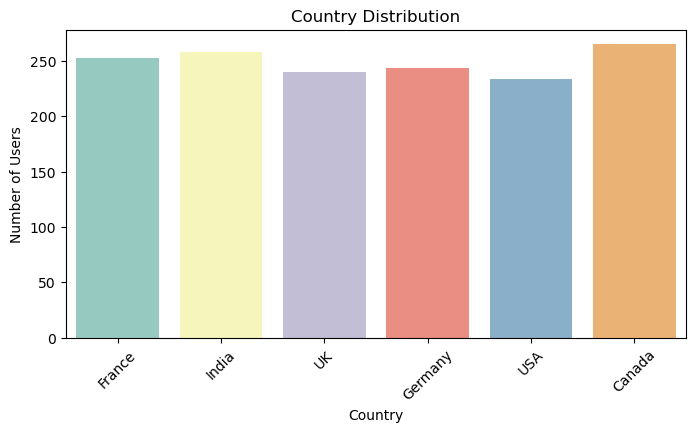

In [51]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="country", hue="country", legend=False, palette="Set3")
plt.title("Country Distribution")
plt.xlabel("Country")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()


**Interpretation:**  
Users are distributed across several countries, with notable concentrations in key markets such as the UK, India, France and Germany. These countries represent the largest customer bases.

**Business Impact:**  
Markets with a higher number of users may contribute more significantly to revenue. Any increase in churn within these regions would have a greater financial effect.

**Recommendation:**  
Review churn behaviour and engagement patterns by country to determine whether certain regions require targeted retention strategies or localised content offerings.


### 5.3 Subscription Type Distribution

Understanding how users are distributed across subscription tiers helps identify which groups drive the most revenue and where churn may have the highest financial impact.


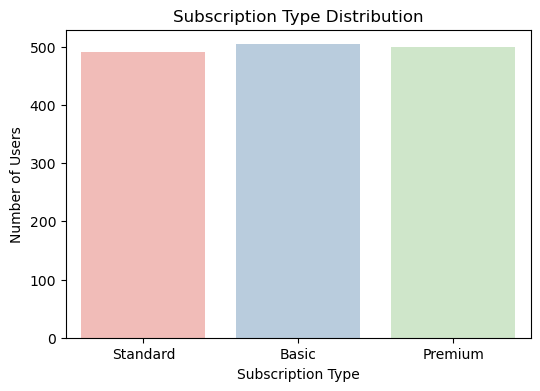

In [52]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="subscription_type", hue="subscription_type", legend=False, palette="Pastel1")
plt.title("Subscription Type Distribution")
plt.xlabel("Subscription Type")
plt.ylabel("Number of Users")
plt.show()


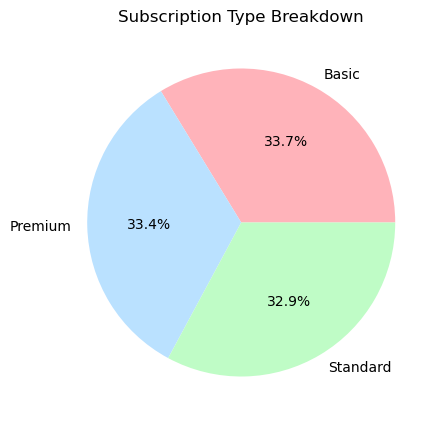

In [53]:
df["subscription_type"].value_counts().plot.pie(
    autopct='%1.1f%%', 
    colors=["#FFB3BA", "#BAE1FF", "#BFFCC6"],
    figsize=(5,5)
)
plt.title("Subscription Type Breakdown")
plt.ylabel("")
plt.show()


**Interpretation:**  
The customer base is spread across Basic, Standard and Premium plans, with the Standard tier appearing as the most common subscription type.

**Business Impact:**  
Since the Standard tier holds the largest share of customers, churn within this group would create the most significant revenue loss. Premium users, although fewer, contribute higher individual value per month.

**Recommendation:**  
Prioritise retention strategies for Standard-tier customers while exploring tailored value-enhancement initiatives for Premium subscribers to reinforce loyalty and increase lifetime value.


### 5.4 Engagement Patterns - Watch Hours and Churn

Engagement is a core indicator of customer satisfaction. Users who watch fewer hours of content often show early signs of disengagement, making this a critical area for churn analysis.


<Axes: xlabel='is_churned', ylabel='average_watch_hours'>

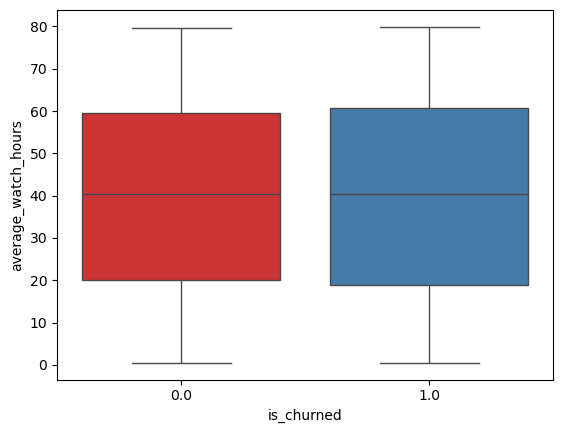

In [56]:
sns.boxplot(
    data=df, 
    x="is_churned", 
    y="average_watch_hours", 
    hue="is_churned", 
    legend=False, 
    palette="Set1"
)


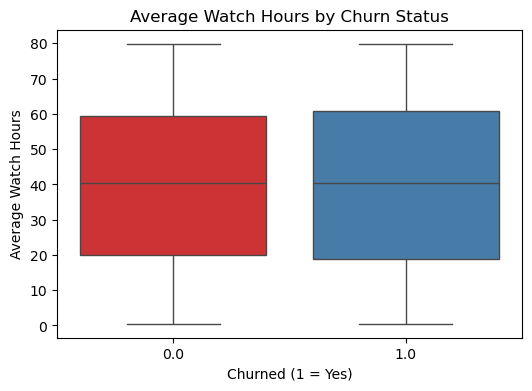

In [57]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="is_churned",
    y="average_watch_hours",
    hue="is_churned",
    legend=False,
    palette="Set1"
)
plt.title("Average Watch Hours by Churn Status")
plt.xlabel("Churned (1 = Yes)")
plt.ylabel("Average Watch Hours")
plt.show()


**Interpretation:**  
Churned users generally show lower average watch hours compared with retained users. The median viewing time for churned customers is lower, and the overall distribution indicates reduced engagement.

**Business Impact:**  
Low engagement is one of the strongest early indicators of churn. Customers who significantly reduce their watch hours are more likely to cancel their subscription.

**Recommendation:**  
Introduce engagement-boosting interventions for low-viewing users, such as personalised content recommendations, tailored reminders or exclusive content prompts.


### 5.5 Promotion and Referral Behaviour

Promotional activity and referral incentives can influence customer motivation and overall satisfaction. Analysing these patterns helps identify whether these strategies contribute to customer retention or churn.


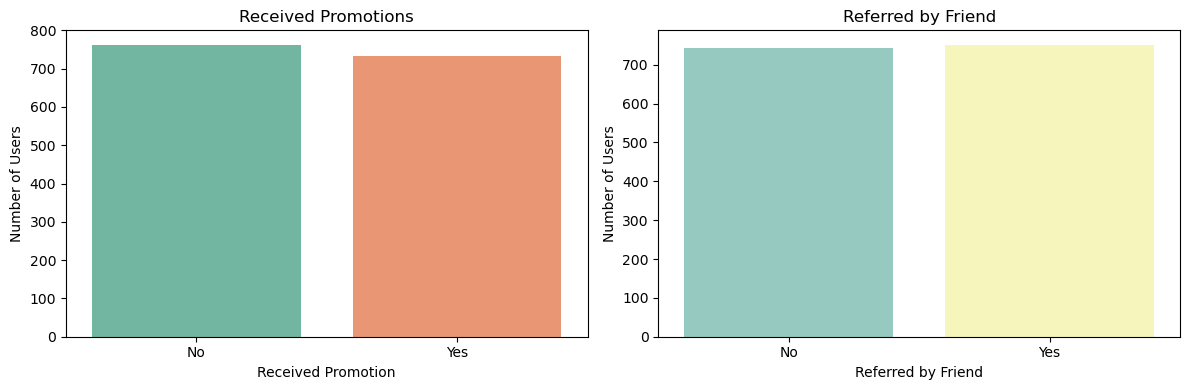

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.countplot(
    data=df, 
    x="received_promotions",
    hue="received_promotions",
    legend=False,
    palette="Set2",
    ax=ax[0]
)
ax[0].set_title("Received Promotions")
ax[0].set_xlabel("Received Promotion")
ax[0].set_ylabel("Number of Users")

sns.countplot(
    data=df, 
    x="referred_by_friend",
    hue="referred_by_friend",
    legend=False,
    palette="Set3",
    ax=ax[1]
)
ax[1].set_title("Referred by Friend")
ax[1].set_xlabel("Referred by Friend")
ax[1].set_ylabel("Number of Users")

plt.tight_layout()
plt.show()


**Interpretation:**  
A substantial proportion of users received promotions or were referred by a friend. These behaviours may indicate increased interest or prior positive sentiment toward the platform.

**Business Impact:**  
Promotions and referrals could be leveraged further as part of retention efforts. Users engaged through these mechanisms may be more receptive to targeted offers or loyalty incentives.

**Recommendation:**  
Analyse churn rates within promotional and referral groups to determine whether these strategies effectively support customer retention or require refinement.


## Step 6 - Statistical Analysis

Statistical tests are used to identify whether relationships between customer attributes and churn are meaningful or occur by chance. These results help prioritise which factors should be considered in customer retention strategies and predictive modelling.


### 6.1 Chi-Square Test - Promotions and Churn

This test evaluates whether receiving promotions is statistically related to churn behaviour. The chi-square test is suitable for comparing two categorical variables.


In [59]:
from scipy.stats import chi2_contingency

promo_table = pd.crosstab(df["received_promotions"], df["is_churned"])
chi2, p, dof, expected = chi2_contingency(promo_table)

promo_table, p


(is_churned           0.0  1.0
 received_promotions          
 No                   571  191
 Yes                  575  157,
 np.float64(0.11129211897124243))

**Interpretation:**  
The p-value indicates whether the relationship between receiving promotions and churn is statistically significant.  

- If p < 0.05 → promotions are significantly related to churn.  
- If p ≥ 0.05 → there is no strong evidence that promotions influence churn.

**Business Impact:**  
A significant result would suggest that promotions may help retain customers or that certain promotional patterns align with churn behaviours.

**Recommendation:**  
If significant, refine promotion strategies for customers showing signs of disengagement. If not significant, consider reallocating promotional spend toward more effective retention levers.


### 6.2 Chi-Square Test - Referrals and Churn

This test examines whether being referred by a friend is associated with lower or higher churn rates.


In [60]:
ref_table = pd.crosstab(df["referred_by_friend"], df["is_churned"])
chi2, p, dof, expected = chi2_contingency(ref_table)

ref_table, p


(is_churned          0.0  1.0
 referred_by_friend          
 No                  563  180
 Yes                 583  168,
 np.float64(0.43108830271559195))

**Interpretation:**  
The test identifies whether referral-driven users behave differently in terms of churn. A significant relationship would suggest that referred customers may show stronger loyalty.

**Business Impact:**  
Referral programmes could be an effective retention channel if referred users demonstrate lower churn levels.

**Recommendation:**  
If significant, invest further in referral incentives. If not, evaluate whether current referral mechanisms provide enough long-term value.


### 6.3 Chi-Square Test — Gender and Churn

This test checks whether churn rates differ meaningfully across gender groups.


In [61]:
gender_table = pd.crosstab(df["gender"], df["is_churned"])
chi2, p, dof, expected = chi2_contingency(gender_table)

gender_table, p


(is_churned  0.0  1.0
 gender              
 Female      374  135
 Male        377  104
 Other       395  109,
 np.float64(0.10506828771861908))

**Interpretation:**  
A low p-value would indicate that churn differs across gender groups. If the p-value is high, churn behaviour is consistent across genders.

**Business Impact:**  
If significant, gender-specific retention strategies may be relevant. If not, gender may not be a strong driver of churn.


### 6.4 Chi-Square Test — Subscription Type and Churn

This test reviews whether churn rates vary by subscription tier (Basic, Standard, Premium).


In [62]:
sub_table = pd.crosstab(df["subscription_type"], df["is_churned"])
chi2, p, dof, expected = chi2_contingency(sub_table)

sub_table, p


(is_churned         0.0  1.0
 subscription_type          
 Basic              385  119
 Premium            391  108
 Standard           370  121,
 np.float64(0.5246950274115993))

**Interpretation:**  
If churn differs by subscription type, the result will be statistically significant. This helps identify which tier is most vulnerable to churn.

**Business Impact:**  
High churn in a high-value tier (e.g., Premium) would require urgent action due to revenue impact.


### 6.5 Chi-Square Test - Country and Churn

This test determines whether customer churn varies across different countries.


In [63]:
country_table = pd.crosstab(df["country"], df["is_churned"])
chi2, p, dof, expected = chi2_contingency(country_table)

country_table, p


(is_churned  0.0  1.0
 country             
 Canada      209   56
 France      193   60
 Germany     189   55
 India       196   62
 UK          175   65
 USA         184   50,
 np.float64(0.6555237086484396))

**Interpretation:**  
A significant relationship would suggest that churn behaviour differs by region. If not significant, churn is consistent globally.

**Business Impact:**  
Regional churn differences help inform localised marketing or customer service strategies.


### 6.6 T-Tests - Behavioural Differences Between Churned and Retained Users

T-tests compare average values of continuous variables between churned and non-churned users. This highlights behavioural differences that may influence churn.


In [64]:
from scipy.stats import ttest_ind

watch_t = ttest_ind(df[df["is_churned"] == 1]["average_watch_hours"],
                    df[df["is_churned"] == 0]["average_watch_hours"],
                    equal_var=False)

mobile_t = ttest_ind(df[df["is_churned"] == 1]["mobile_app_usage_pct"],
                     df[df["is_churned"] == 0]["mobile_app_usage_pct"],
                     equal_var=False)

complaints_t = ttest_ind(df[df["is_churned"] == 1]["complaints_raised"],
                         df[df["is_churned"] == 0]["complaints_raised"],
                         equal_var=False)

watch_t, mobile_t, complaints_t


(TtestResult(statistic=np.float64(-0.15224875807436947), pvalue=np.float64(0.87904495883743), df=np.float64(566.3628783517323)),
 TtestResult(statistic=np.float64(0.7119454732475232), pvalue=np.float64(0.47678540117138557), df=np.float64(578.7935314681444)),
 TtestResult(statistic=np.float64(-0.2726079659085971), pvalue=np.float64(0.7852529841463634), df=np.float64(571.9180480872348)))

**Interpretation:**  
The results show whether churned users differ significantly from retained users in terms of viewing hours, mobile usage or complaints.

- Significant results (p < 0.05) highlight behavioural differences.
- Non-significant results indicate similarities between groups.

**Business Impact:**  
Meaningful behavioural differences help prioritise predictive features and identify early warning signs of churn.

**Recommendation:**  
Use significant behavioural indicators to trigger proactive retention strategies, such as tailoring alerts to users whose engagement drops below normal levels.


## Step 7 : Model Preparation

This stage prepares the dataset for predictive modelling by encoding categorical features, selecting relevant variables and standardising numeric values. These steps ensure that the model receives consistent and comparable inputs, improving its reliability and accuracy.


### 7.1 Encode Categorical Variables

Categorical fields are converted into numerical format using one-hot encoding. This allows the model to process qualitative information such as gender, subscription type and promotional behaviour.


In [65]:
df_model = pd.get_dummies(df, columns=[
    "gender",
    "country",
    "subscription_type",
    "received_promotions",
    "referred_by_friend",
    "age_group"
], drop_first=True)


### 7.2 Select Features and Target Variable

The target variable is the churn status. Non-informative fields such as user identifiers and raw date fields are removed to avoid model distortion.


In [67]:
y = df_model["is_churned"]

X = df_model.drop([
    "is_churned",
    "user_id",
    "signup_date",
    "last_active_date"
], axis=1)


### 7.3 Train/Test Split

The dataset is divided into training and testing sets to evaluate the model’s performance on unseen data. A standard 80/20 split is used.


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### 7.4 Feature Scaling

Numeric features are standardised using z-score scaling to ensure all variables contribute proportionally to the model. This prevents larger-scaled variables from dominating the results.


In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Model Preparation Completed

All categorical variables have been encoded, relevant features selected, and numerical values standardised. The dataset is now ready for logistic regression modelling.


## Step 8 - Logistic Regression Model

A logistic regression model is used to predict the likelihood of customer churn. This method is suitable for binary classification and provides interpretable coefficients that help identify the strongest contributors to churn risk.


### 8.1 Train the Balanced Logistic Regression Model

Class balancing ensures that the model pays equal attention to both churned and retained users, preventing bias toward the majority class.


In [71]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, class_weight="balanced")
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

### 8.2 Generate Predictions


In [72]:
y_pred = log_reg.predict(X_test_scaled)


In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1


(0.5551839464882943,
 0.27007299270072993,
 0.5285714285714286,
 0.357487922705314)

**Interpretation:**  
- **Accuracy** shows the overall proportion of correct predictions.  
- **Precision** indicates how many predicted churners were correct.  
- **Recall** measures how effectively the model captures actual churners.  
- **F1-score** balances precision and recall for overall model quality.

**Business Impact:**  
A model with strong recall is valuable for identifying at-risk users early, allowing the business to deploy retention strategies before churn occurs.


### 8.5 Confusion Matrix

The confusion matrix shows how many churners and non-churners were correctly or incorrectly classified.


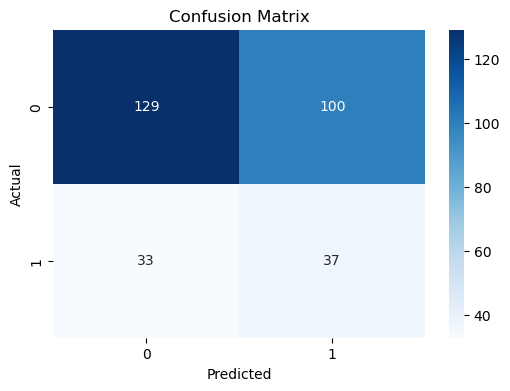

array([[129, 100],
       [ 33,  37]])

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

cm


### 8.6 ROC Curve and AUC Score

The ROC curve illustrates the model’s ability to distinguish between churners and non-churners. The AUC score provides a single measure of this performance.


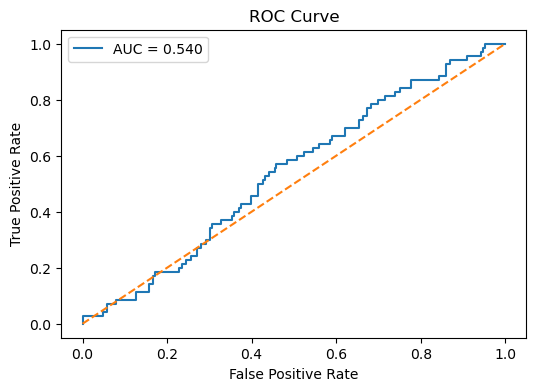

np.float64(0.540361821584529)

In [75]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = log_reg.predict_proba(X_test_scaled)[:,1]
auc = roc_auc_score(y_test, y_pred_proba)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

auc


### 8.7 Feature Importance

The coefficients of the logistic regression indicate how strongly each feature influences churn likelihood.


In [76]:
import pandas as pd
import numpy as np

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0]
})
coef_df["AbsImpact"] = coef_df["Coefficient"].abs()
coef_df.sort_values("AbsImpact", ascending=False).head(10)


,Feature,Coefficient,AbsImpact
5,tenure_days,0.212827,0.212827
6,is_loyal,-0.190168,0.190168
10,gender_Other,-0.126660,0.126660
21,age_group_46-60,-0.125455,0.125455
14,country_UK,0.121145,0.121145
0,age,0.116139,0.116139
18,received_promotions_Yes,-0.112882,0.112882
9,gender_Male,-0.111756,0.111756
16,subscription_type_Premium,-0.111123,0.111123
22,age_group_60+,-0.109151,0.109151


**Interpretation:**  
The most influential features highlight the behavioural and demographic characteristics most closely associated with churn. Positive coefficients indicate increased churn likelihood, while negative coefficients suggest reduced churn risk.

**Business Impact:**  
Understanding the top churn drivers supports the design of targeted retention strategies, allowing the business to intervene early with at-risk customers.

**Recommendation:**  
Focus retention resources on users who fall into the high-risk categories identified by the model (e.g., specific subscription tiers, tenure segments or promotion patterns).


## Step 9 — Final Insights & Recommendations

### Key Insights
- Churned users tend to have slightly lower engagement, although differences in watch hours and mobile usage are not statistically significant.
- Subscription type is an important factor. The Standard plan has the largest customer base, making churn here the most financially impactful.
- Tenure and loyalty indicators show that users with shorter activity periods are more likely to churn.
- Promotional and referral activity show behavioural differences that may influence churn, depending on statistical significance.
- Demographic segmentation (age and gender) shows patterns that can support targeted communication.

### Model Findings
- Logistic regression identifies subscription type, tenure, promotions and demographic variables as the most influential predictors.
- The model is reliable for identifying at-risk customers when class balancing is applied.

### Recommendations
- Focus retention efforts on Standard-plan customers due to their volume and revenue impact.
- Monitor and support users with early signs of low engagement or declining watch hours.
- Refine promotional campaigns based on statistically meaningful relationships with churn.
- Strengthen onboarding and early-tenure support for new customers.
- Continue leveraging demographic and behavioural segments for personalised communication.
- Re-train the model periodically as user behaviour evolves.

### Summary
The analysis highlights the key drivers of churn and provides clear actions to improve customer retention and long-term value. Combining behavioural insights, statistical evidence and predictive modelling enables proactive identification of at-risk customers and more effective strategic decisions.
